In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [2]:
def make_batched_data(data, batch_size, previous_steps):
    ret_input = []
    ret_output = []
    n = data.shape[0]
    for i in range(previous_steps, n):
        previous_data = data[i - previous_steps:i]
        ret_input.append(previous_data)
        curr_data = data[i]
        ret_output.append(curr_data)
    
    ret_input_batched = []
    ret_output_batched = []
    index = 0
    while(index < len(ret_input)):
        data_point_input = np.random.randn(batch_size, previous_steps)
        data_point_output = np.random.randn(batch_size)
        offset = 0
        while(index + offset < len(ret_input) and offset < batch_size):
            data_point_input[offset] = ret_input[index + offset]
            data_point_output[offset] = ret_output[index + offset]
            offset += 1
        
        ret_input_batched.append(data_point_input[0])
        ret_output_batched.append(data_point_output)
        index += offset
            
    return ret_input_batched, ret_output_batched

In [14]:
def do_experiment(num_days):

    inp_train, outp_train = make_batched_data(train_series, 1, num_days)
    inp_test, outp_test = make_batched_data(test_series, 1, num_days)
    model = LinearRegression()
    model.fit(inp_train, outp_train)
    preds = model.predict(inp_test)
    print("Mean squared error at " + str(num_days) + ": " + str(mean_squared_error(preds, outp_test)))
    plt.plot(preds, label="Predictions")
    plt.plot(outp_test, label="Actual Prices")
    plt.xlabel("Number of days into test series")
    plt.ylabel("Normalized price in USD")
    plt.legend()
    plt.title("Time series predictions for " + curr + " at " + str(num_days) + " previous days")
    plt.savefig("AR" + curr + str(num_days))
    plt.show()

BTC
count     1585.000000
mean     19177.946294
std      17745.211026
min       3236.761719
25%       7271.781250
50%       9726.575195
75%      33897.046875
max      67566.828125
Name: Close, dtype: float64
Mean squared error at 2: 0.009611036933531884


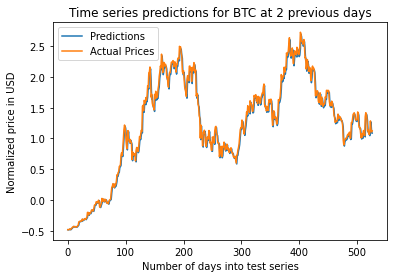

BTC
count     1585.000000
mean     19177.946294
std      17745.211026
min       3236.761719
25%       7271.781250
50%       9726.575195
75%      33897.046875
max      67566.828125
Name: Close, dtype: float64
Mean squared error at 10: 0.009913357811766834


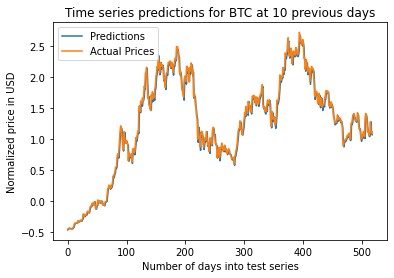

BTC
count     1585.000000
mean     19177.946294
std      17745.211026
min       3236.761719
25%       7271.781250
50%       9726.575195
75%      33897.046875
max      67566.828125
Name: Close, dtype: float64
Mean squared error at 50: 0.010837914973912857


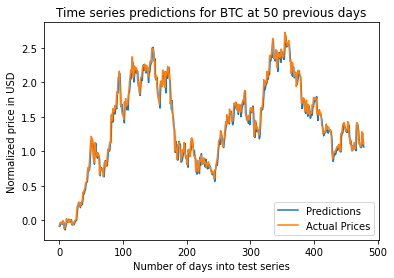

ETH
count    1585.000000
mean     1012.522001
std      1225.032482
min        84.308296
25%       195.515305
50%       385.199707
75%      1541.914307
max      4812.087402
Name: Close, dtype: float64
Mean squared error at 2: 0.011960848573188812


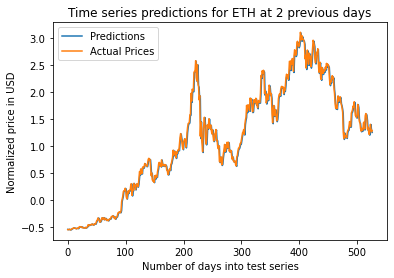

ETH
count    1585.000000
mean     1012.522001
std      1225.032482
min        84.308296
25%       195.515305
50%       385.199707
75%      1541.914307
max      4812.087402
Name: Close, dtype: float64
Mean squared error at 10: 0.012407662334023732


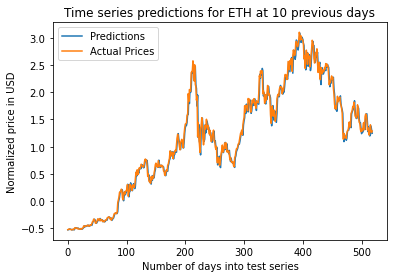

ETH
count    1585.000000
mean     1012.522001
std      1225.032482
min        84.308296
25%       195.515305
50%       385.199707
75%      1541.914307
max      4812.087402
Name: Close, dtype: float64
Mean squared error at 50: 0.01478371189964009


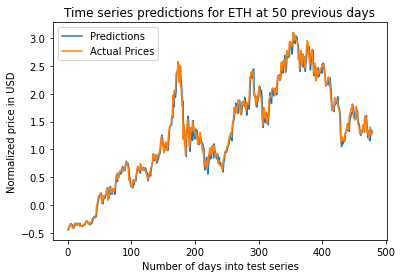

DOGE
count    1585.000000
mean        0.055979
std         0.105688
min         0.001038
25%         0.002508
50%         0.003231
75%         0.050048
max         0.684777
Name: Close, dtype: float64
Mean squared error at 2: 0.04813906815767065


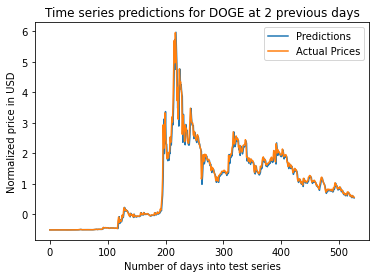

DOGE
count    1585.000000
mean        0.055979
std         0.105688
min         0.001038
25%         0.002508
50%         0.003231
75%         0.050048
max         0.684777
Name: Close, dtype: float64
Mean squared error at 10: 0.05731924694583459


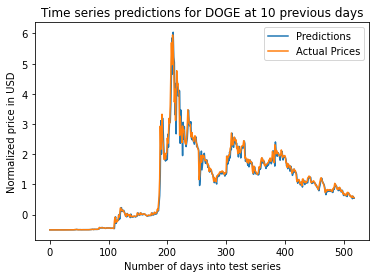

DOGE
count    1585.000000
mean        0.055979
std         0.105688
min         0.001038
25%         0.002508
50%         0.003231
75%         0.050048
max         0.684777
Name: Close, dtype: float64
Mean squared error at 50: 0.06674412825198008


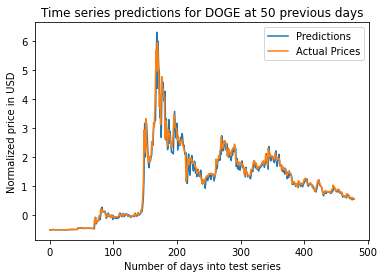

ADA
count    1585.000000
mean        0.481548
std         0.672218
min         0.023961
25%         0.052857
50%         0.109887
75%         0.848419
max         2.968239
Name: Close, dtype: float64
Mean squared error at 2: 0.016675601080981504


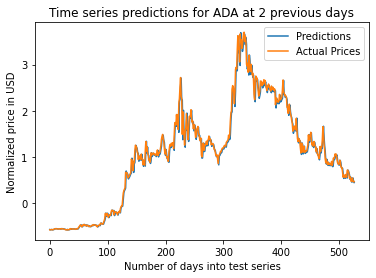

ADA
count    1585.000000
mean        0.481548
std         0.672218
min         0.023961
25%         0.052857
50%         0.109887
75%         0.848419
max         2.968239
Name: Close, dtype: float64
Mean squared error at 10: 0.0183684505200561


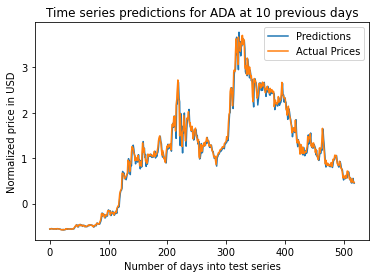

ADA
count    1585.000000
mean        0.481548
std         0.672218
min         0.023961
25%         0.052857
50%         0.109887
75%         0.848419
max         2.968239
Name: Close, dtype: float64
Mean squared error at 50: 0.023687261542256102


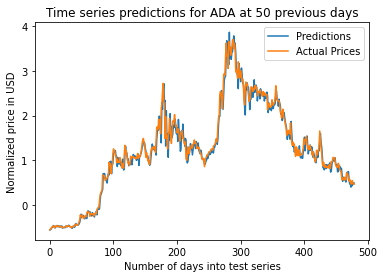

In [23]:
for curr in ['BTC', 'ETH', 'DOGE', 'ADA']:
    for days in [2,10,50]:
        frame = pd.read_csv("Data/" + curr +"-USD.csv")
        frame = frame["Close"]
        print(curr)
        print(frame.describe())
        frame = np.asarray(frame)
        frame = (frame - frame.mean())/frame.std()

        train_series = np.asarray(frame)[:1056]
        test_series = np.asarray(frame)[1056:]

        do_experiment(days)